In [8]:
import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
# --- FUNCTION to preprocess .txt files for consistent delimiters


def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path) as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r"\s+", line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r"\s+", line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [3]:
# --- read in flux data from two runs
# flux data are colum integrated fluxes with all timesteps in a single file


# where results are stored
results_path = {"hipsd": "ERW24_3-3-App90p_site8", "lowpsd": "ERW24_3-3-PSD10p_site8"}
# results_path = {"colddry": "ERW24_3-3-ColdDryv1_site8", "warmwet": "ERW24_3-3-WarmWetv1_site8"}
# results_path = {"hiapp": "ERW24_3-3-HiAppRatev1_site8", "lowapp": "ERW24_3-3-LowAppRatev1_site8"}

# define file name pattern
# fn_pref = ["int_flx_co2sp", "flx_co2sp" "int_flx_gas", "flx_gas"]   # will read in all species unless fn_varInclude is defined
fn_pref = [
    "int_flx_gas",
    "flx_gas",
]  # will read in all species unless fn_varInclude is defined
fn_varInclude = []
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"

# loop through runs
df = pd.DataFrame()  # initialize empty df to store dat
for key, run in results_path.items():
    # get these paths
    flx_path, prof_path = os.path.join(run, "flx"), os.path.join(run, "prof")

    # loop through variables
    for fset in fn_pref:
        # set pattern
        fn_pattern = f"{fset}-*{fn_ext}"
        # get list of filenames
        file_paths = glob.glob(f"{flx_path}/{fn_pattern}")

        # read in data and concatenate
        for file_path in file_paths:
            # get the variable
            varpattern = re.escape(fset) + r"-(.*?).txt"
            varmatch = re.search(varpattern, file_path)
            var = varmatch.group(1)
            # skip this step if it's not in the include arr
            if varCheck:
                if var not in fn_varInclude:
                    continue
            # read in
            dfi = preprocess_txt(file_path)
            # apply pd.to_numeric to all columns using the "map" method
            dfi = dfi.map(pd.to_numeric)
            # add set, var, and key
            dfi["set"] = fset
            dfi["var"] = var
            dfi["run_id"] = key
            # combine
            df = pd.concat([df, dfi], ignore_index=True)

# sort by time and depth
df = df.sort_values(by=["var", "time"])
df

,time,tflx,adv,dif,rain,amsi,cc,dlm,tm,ka,...,g2,fo,an,fa,gt,fe2o2,res,set,var,run_id
25,0.000111,-0.205482,0.518334,72.076096,0.0,0.0,-0.095270,-0.001885,0.0,0.0,...,-72.291794,0.0,0.0,0.0,0.0,0.000000e+00,-4.841863e-13,int_flx_gas,pco2,hipsd
75,0.000111,-0.179525,0.518462,72.058975,0.0,0.0,-0.104136,-0.001887,0.0,0.0,...,-72.291889,0.0,0.0,0.0,0.0,0.000000e+00,-6.169942e-14,flx_gas,pco2,hipsd
131,0.000121,4.038420,0.531925,70.347959,0.0,0.0,-2.358611,-0.267884,0.0,0.0,...,-72.291809,0.0,0.0,0.0,0.0,0.000000e+00,7.739283e-13,int_flx_gas,pco2,lowpsd
193,0.000121,4.689812,0.534552,69.997882,0.0,0.0,-2.664373,-0.265908,0.0,0.0,...,-72.291966,0.0,0.0,0.0,0.0,0.000000e+00,-2.718518e-14,flx_gas,pco2,lowpsd
26,0.000311,-0.001309,0.518049,71.942478,0.0,0.0,-0.165130,-0.001898,0.0,0.0,...,-72.292190,0.0,0.0,0.0,0.0,0.000000e+00,-1.428983e-13,int_flx_gas,pco2,hipsd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.401191,-0.008124,-0.003375,-72.258710,0.0,0.0,0.000000,0.000000,0.0,0.0,...,72.270209,0.0,0.0,0.0,0.0,8.268269e-16,-7.159060e-12,flx_gas,po2,lowpsd
129,0.451071,-0.005984,-0.003302,-72.272187,0.0,0.0,0.000000,0.000000,0.0,0.0,...,72.281472,0.0,0.0,0.0,0.0,1.325495e-15,-4.056180e-12,int_flx_gas,po2,lowpsd
191,0.451071,-0.008280,-0.003397,-72.254757,0.0,0.0,0.000000,0.000000,0.0,0.0,...,72.266434,0.0,0.0,0.0,0.0,2.754590e-15,-4.661577e-13,flx_gas,po2,lowpsd
130,0.500531,-0.006219,-0.003312,-72.270255,0.0,0.0,0.000000,0.000000,0.0,0.0,...,72.279786,0.0,0.0,0.0,0.0,1.260939e-15,-3.989044e-12,int_flx_gas,po2,lowpsd


In [4]:
# --- compute the change in CO2 relative to t=0 in diffusion and advection
#     [for now I'll take the minimum value and subtract that out to account for a blip (maybe numerical?) at first timestep)]
# create new column
# pvars = ["co2g", "DIC"]
pvars = ["pco2", "pco2", "pco2"]
flxtype = ["dif", "adv", "g2"]  # these align with pvars

# get set of unique ids / sets
unique_groups = df[["set", "run_id"]].drop_duplicates()

# loop through pvars
outdf = pd.DataFrame()  # initialize empty df to store dat
for tdx in range(len(pvars)):
    thisvar = pvars[tdx]
    thisflx = flxtype[tdx]
    thiscolname = thisflx + "_" + thisvar + "_change"
    df[thiscolname] = 0.0  # initialize column

    # loop through sets
    for idx, dset in unique_groups.iterrows():
        # subset data
        cond = (
            (df["set"] == dset["set"])
            & (df["run_id"] == dset["run_id"])
            & (df["var"] == thisvar)
        )
        dfx = df[cond]
        # get initial flux
        # diff_init = dfx.loc[dfx['time'].idxmin(), thisflx]
        if thisflx == "dif":  # start with max
            diff_init = dfx[thisflx].max()
        else:
            diff_init = dfx[thisflx].min()
        # fill in new column
        df.loc[cond, thiscolname] = df.loc[cond, thisflx] - diff_init

df

,time,tflx,adv,dif,rain,amsi,cc,dlm,tm,ka,...,fa,gt,fe2o2,res,set,var,run_id,dif_pco2_change,adv_pco2_change,g2_pco2_change
25,0.000111,-0.205482,0.518334,72.076096,0.0,0.0,-0.095270,-0.001885,0.0,0.0,...,0.0,0.0,0.000000e+00,-4.841863e-13,int_flx_gas,pco2,hipsd,0.000000,0.121848,0.001203
75,0.000111,-0.179525,0.518462,72.058975,0.0,0.0,-0.104136,-0.001887,0.0,0.0,...,0.0,0.0,0.000000e+00,-6.169942e-14,flx_gas,pco2,hipsd,0.000000,0.144061,0.001246
131,0.000121,4.038420,0.531925,70.347959,0.0,0.0,-2.358611,-0.267884,0.0,0.0,...,0.0,0.0,0.000000e+00,7.739283e-13,int_flx_gas,pco2,lowpsd,-0.502996,0.000000,0.001747
193,0.000121,4.689812,0.534552,69.997882,0.0,0.0,-2.664373,-0.265908,0.0,0.0,...,0.0,0.0,0.000000e+00,-2.718518e-14,flx_gas,pco2,lowpsd,-1.436746,0.000000,0.001713
26,0.000311,-0.001309,0.518049,71.942478,0.0,0.0,-0.165130,-0.001898,0.0,0.0,...,0.0,0.0,0.000000e+00,-1.428983e-13,int_flx_gas,pco2,hipsd,-0.133618,0.121563,0.000807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.401191,-0.008124,-0.003375,-72.258710,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,8.268269e-16,-7.159060e-12,flx_gas,po2,lowpsd,0.000000,0.000000,0.000000
129,0.451071,-0.005984,-0.003302,-72.272187,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.325495e-15,-4.056180e-12,int_flx_gas,po2,lowpsd,0.000000,0.000000,0.000000
191,0.451071,-0.008280,-0.003397,-72.254757,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,2.754590e-15,-4.661577e-13,flx_gas,po2,lowpsd,0.000000,0.000000,0.000000
130,0.500531,-0.006219,-0.003312,-72.270255,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.260939e-15,-3.989044e-12,int_flx_gas,po2,lowpsd,0.000000,0.000000,0.000000


In [5]:
# --- compute CDR following Kanzaki / Baek (not accounting for respiration change here because T is held constant)
# difcol, advcol = 'dif_co2g_change', 'adv_DIC_change'
# difvar, advvar = 'co2g', 'DIC'
difcol, advcol = "dif_pco2_change", "adv_pco2_change"
difvar, advvar = "pco2", "pco2"
adv_lossFactor = 0  # fraction of advected C that we lose (Baek et al., 2023 use 0.14)

# assign CDR potentials for each rock (mass per mass)
cc_rco2 = 0.6  # PLACEHOLDER guesses
ba_rco2 = 0.3  # PLACEHOLDER guesses
appRate = 40  # ton rock / ha / yr
# loop through sets
outdf = pd.DataFrame()  # initialize empty df to store dat
for idx, dset in unique_groups.iterrows():
    # set rco2
    if dset["run_id"] == "calcite":
        rco2 = cc_rco2
    else:
        rco2 = ba_rco2

    # subset data
    dif_cond = (
        (df["set"] == dset["set"])
        & (df["run_id"] == dset["run_id"])
        & (df["var"] == difvar)
    )
    adv_cond = (
        (df["set"] == dset["set"])
        & (df["run_id"] == dset["run_id"])
        & (df["var"] == advvar)
    )
    # create output df
    dif_df = df.loc[dif_cond, ["time", difcol]]
    adv_df = df.loc[adv_cond, ["time", advcol]]
    outdf_i = pd.merge(dif_df, adv_df, on="time", how="outer")
    # compute cdr
    outdf_i["cdr_mol_m2_yr"] = -1 * outdf_i[difcol] + outdf_i[advcol] * (
        1 - adv_lossFactor
    )
    outdf_i["cdrAdv_mol_m2_yr"] = outdf_i[advcol] * (1 - adv_lossFactor)

    # compute theoretical max
    outdf_i["cdrMax_ton_ha_yr"] = appRate * rco2

    # apply 50% calcite haircut
    if dset["run_id"] == "calcite":
        outdf_i["cdr_mol_m2_yr"] = outdf_i["cdr_mol_m2_yr"] / 2
        outdf_i["cdrAdv_mol_m2_yr"] = outdf_i["cdrAdv_mol_m2_yr"] / 2

    # add set
    outdf_i["set"] = dset["set"]
    outdf_i["run_id"] = dset["run_id"]
    # get output dataset
    outdf = pd.concat([outdf, outdf_i], ignore_index=True)

# convert to tons / ha / yr
co2_g_mol = 44.01
ton_g = 1 / 1e6
m2_ha = 10e3
outdf["cdr_ton_ha_yr"] = outdf["cdr_mol_m2_yr"] * co2_g_mol * ton_g * m2_ha
outdf["cdrAdv_ton_ha_yr"] = outdf["cdrAdv_mol_m2_yr"] * co2_g_mol * ton_g * m2_ha

In [6]:
# get cumulative and potential cdr
# def integrate(x):
#     return cumtrapz(x, initial=0)
# outdf['cdrAdv_integrated_ton_ha'] = outdf.groupby(['run_id', 'set'])['cdrAdv_ton_ha_yr'].transform(integrate)
# outdf['cdrMax_ton_ha'] = outdf.groupby(['run_id', 'set'])['cdrMax_ton_ha_yr'].transform(integrate)

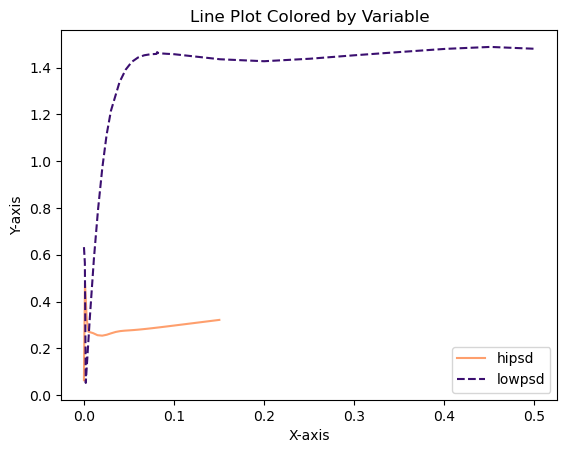

In [7]:
# --- plot CDR per year (lines colored by the set)
cdvar = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
dfhi_cont = outdf[
    (outdf["set"] == "flx_gas") & (outdf["run_id"] == list(results_path.keys())[0])
]
dflow_cont = outdf[
    (outdf["set"] == "flx_gas") & (outdf["run_id"] == list(results_path.keys())[1])
]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
plt.plot(
    dfhi_cont["time"],
    dfhi_cont[cdvar],
    color=cmap(0.2),
    label=list(results_path.keys())[0],
    linestyle="-",
)
plt.plot(
    dflow_cont["time"],
    dflow_cont[cdvar],
    color=cmap(0.8),
    label=list(results_path.keys())[1],
    linestyle="--",
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.0001, 15])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

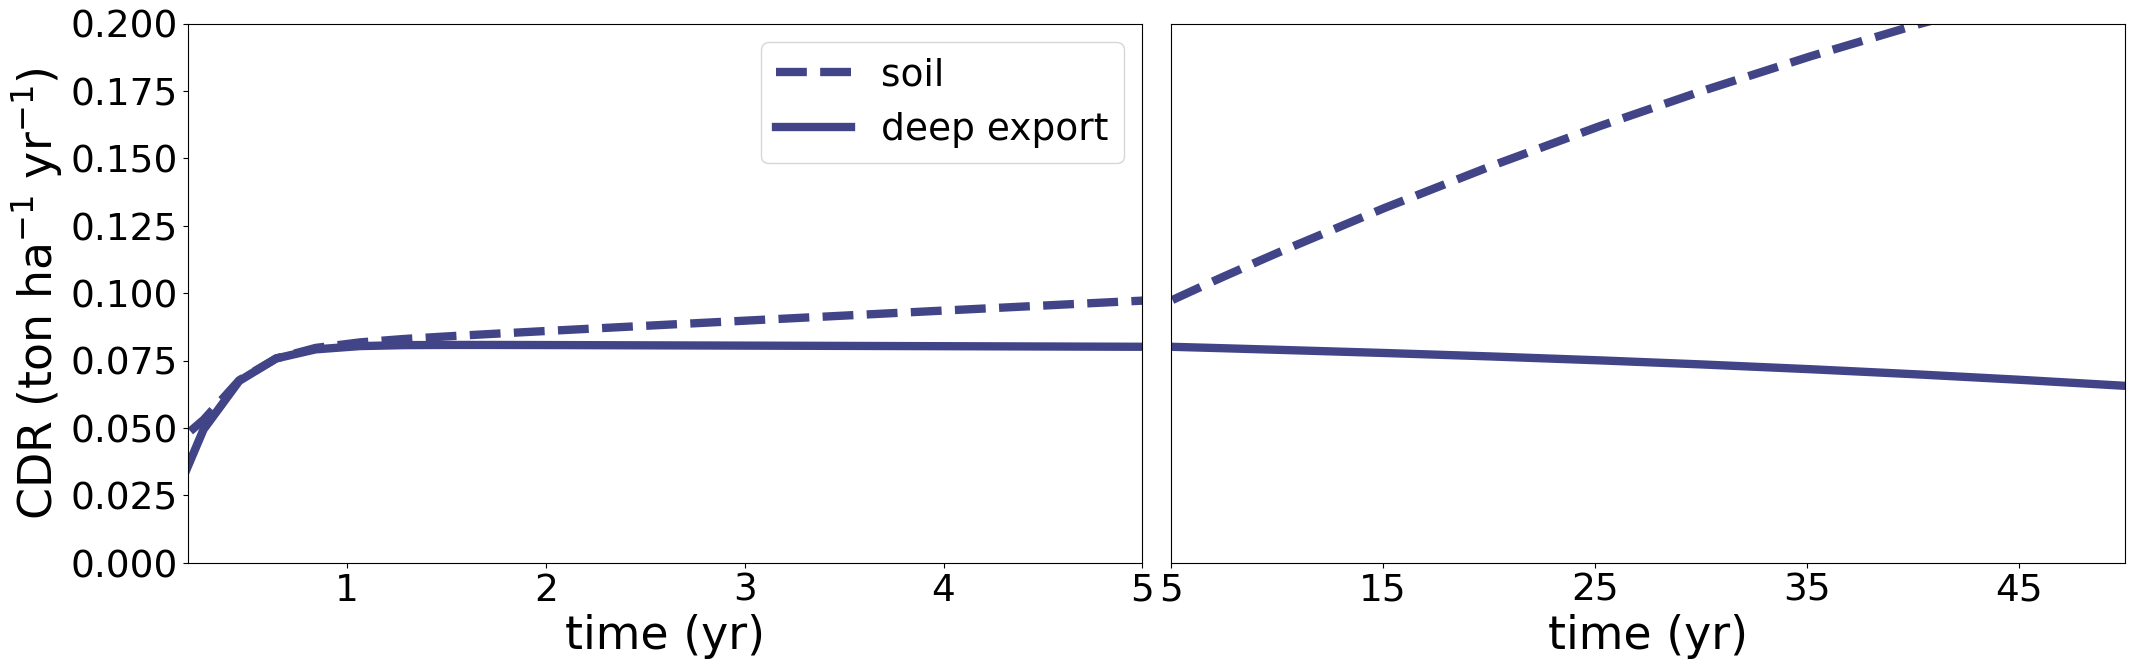

In [8]:
# --- plot basalt only CDR in years 1-5 then 5-100
# ----------------------------------------------------- #
saveFig = False
saveHere = "zz_figures/ex3_calcite-basalt"
saveName = "basalt_exportCompare_2panels.png"
# ----------------------------------------------------- #

cdvarAdv = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "viridis"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
# dfcc_cont = outdf[(outdf['set'] == "flx_co2sp") & (outdf['run_id'] == "calcite")]
dfbas_cont = outdf[(outdf["set"] == "flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap

# axis labels and limits
xlab = "time (yr)"
ylab = r"CDR (ton ha$^{-1}$ yr$^{-1}$)"
ymin, ymax = 0, 0.2
xmin1, xmax1, xmin2, xmax2 = 0.2, 5, 5, 50
ticksize = 27
titlesize = 33
xtick2 = [5, 15, 25, 35, 45]
# line aes
lwd = 6
# legend
legsize = 27  # legend font size
second_legend = False

# --- PLOT
fig = plt.figure(figsize=(25, 7))  # Adjust figsize as needed
gs = GridSpec(1, 2, figure=fig, wspace=0.03)

# PANEL 1: years 0-5
ax = fig.add_subplot(gs[0])
plt.plot(
    dfbas_cont["time"],
    dfbas_cont[cdvar],
    color=cmap(0.8),
    label="soil",
    linestyle="--",
    linewidth=lwd,
)
plt.plot(
    dfbas_cont["time"],
    dfbas_cont[cdvarAdv],
    color=cmap(0.8),
    label="deep export",
    linestyle="-",
    linewidth=lwd,
)
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(fontsize=ticksize)
plt.xlim([xmin1, xmax1])
plt.ylabel(ylab, fontsize=titlesize)
plt.yticks(fontsize=ticksize)
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
plt.legend(fontsize=legsize)

# PANEL 2: years 5-100
ax = fig.add_subplot(gs[1])
plt.plot(
    dfbas_cont["time"],
    dfbas_cont[cdvar],
    color=cmap(0.8),
    label="soil",
    linestyle="--",
    linewidth=lwd,
)
plt.plot(
    dfbas_cont["time"],
    dfbas_cont[cdvarAdv],
    color=cmap(0.8),
    label="deep export",
    linestyle="-",
    linewidth=lwd,
)
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(xtick2, [int(val) for val in xtick2], fontsize=ticksize)
plt.xlim([xmin2, xmax2])
plt.yticks([])
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
if second_legend:
    plt.legend(fontsize=legsize)

# save if allowed
if saveFig:
    plt.savefig(os.path.join(saveHere, saveName), bbox_inches="tight")

plt.show();

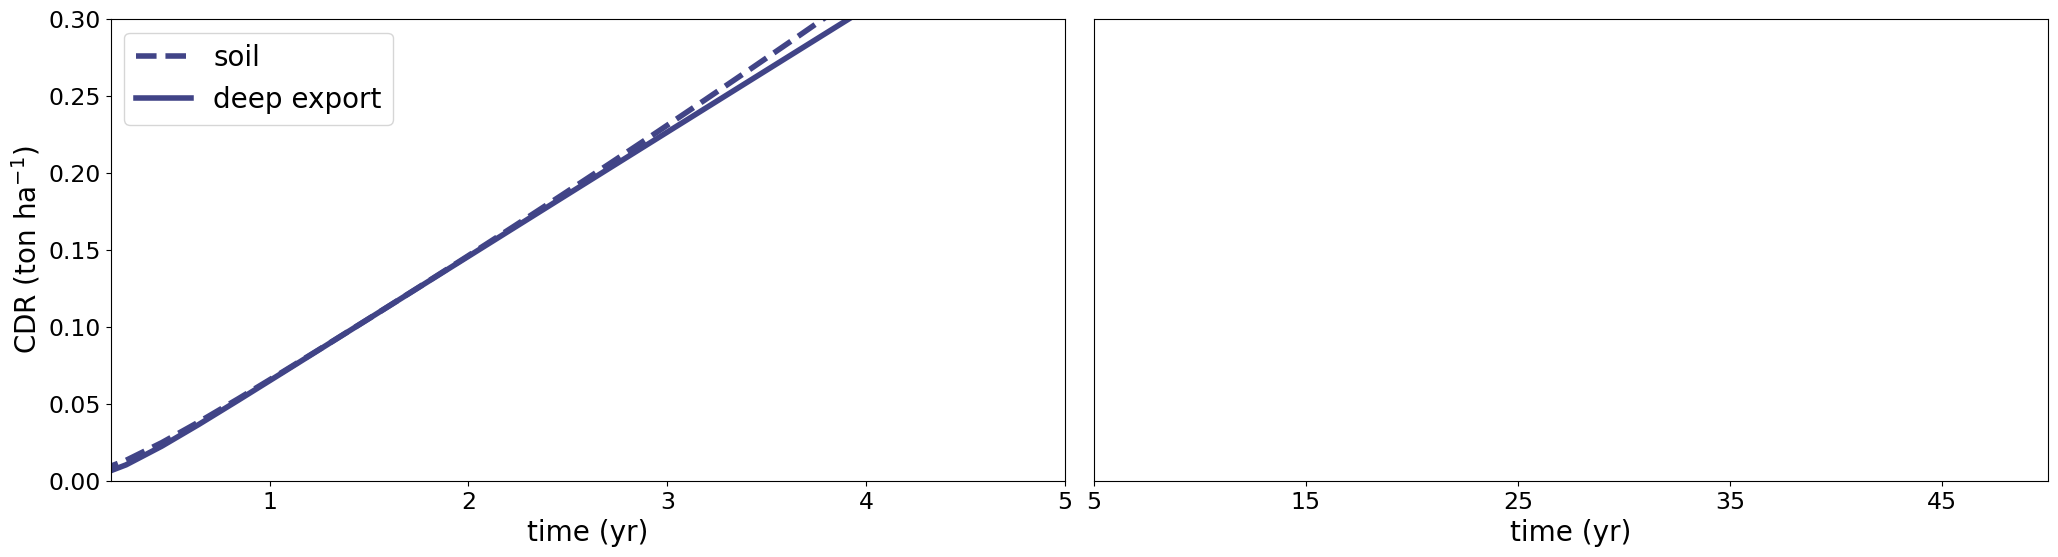

In [9]:
# --- plot basalt only CDR in years 1-5 then 5-100 (integrated)
# ----------------------------------------------------- #
saveFig = False
saveHere = "zz_figures/ex3_calcite-basalt"
saveName = "basalt_exportCompare_2panels_integrated.png"
# ----------------------------------------------------- #

cdvarAdv = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "viridis"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
# dfcc_cont = outdf[(outdf['set'] == "flx_co2sp") & (outdf['run_id'] == "calcite")]
dfbas_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap

# axis labels and limits
xlab = "time (yr)"
ylab = r"CDR (ton ha$^{-1}$)"
xmin1, xmax1, xmin2, xmax2 = 0.2, 5, 5, 50
ymin, ymax = 0, 0.3
ticksize = 17
titlesize = 20
xtick2 = [5, 15, 25, 35, 45]
# line aes
lwd = 4
# legend
legsize = 20  # legend font size
second_legend = False

# --- PLOT
fig = plt.figure(figsize=(25, 6))  # Adjust figsize as needed
gs = GridSpec(1, 2, figure=fig, wspace=0.03)

# PANEL 1: years 0-5
ax = fig.add_subplot(gs[0])
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvar] * dfbas_int["time"],
    color=cmap(0.8),
    label="soil",
    linestyle="--",
    linewidth=lwd,
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvarAdv] * dfbas_int["time"],
    color=cmap(0.8),
    label="deep export",
    linestyle="-",
    linewidth=lwd,
)
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(fontsize=ticksize)
plt.xlim([xmin1, xmax1])
plt.ylabel(ylab, fontsize=titlesize)
plt.yticks(fontsize=ticksize)
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
plt.legend(fontsize=legsize)

# PANEL 2: years 5-100
ax = fig.add_subplot(gs[1])
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvar] * dfbas_int["time"],
    color=cmap(0.8),
    label="soil",
    linestyle="--",
    linewidth=lwd,
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvarAdv] * dfbas_int["time"],
    color=cmap(0.8),
    label="deep export",
    linestyle="-",
    linewidth=lwd,
)
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(xtick2, [int(val) for val in xtick2], fontsize=ticksize)
plt.xlim([xmin2, xmax2])
plt.yticks([])
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
if second_legend:
    plt.legend(fontsize=legsize)

# save if allowed
if saveFig:
    plt.savefig(os.path.join(saveHere, saveName), bbox_inches="tight")

plt.show();

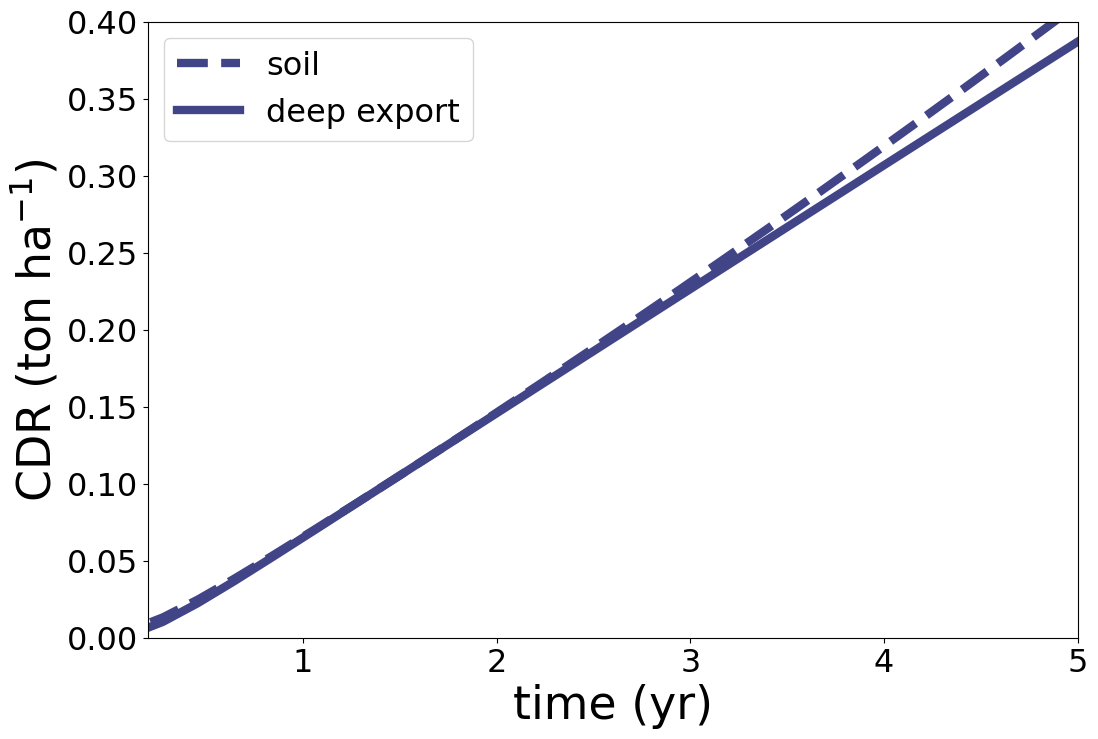

In [11]:
# --- plot basalt only CDR in cumulative ton/ha
# ----------------------------------------------------- #
saveFig = False
saveHere = "zz_figures/ex3_calcite-basalt"
saveName = "basalt_exportCompare_1panel_integrated.png"
# ----------------------------------------------------- #

cdvarAdv = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "viridis"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
# dfcc_cont = outdf[(outdf['set'] == "flx_co2sp") & (outdf['run_id'] == "calcite")]
dfbas_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap

# axis labels and limits
xlab = "time (yr)"
ylab = r"CDR (ton ha$^{-1}$)"
xmin, xmax = 0.2, 5
ymin, ymax = 0, 0.4
ticksize = 23
titlesize = 33
xtick2 = [5, 15, 25, 35, 45]
# line aes
lwd = 6
# legend
legsize = 23  # legend font size
second_legend = False

# --- PLOT
fig = plt.figure(figsize=(12, 8))  # Adjust figsize as needed
gs = GridSpec(1, 1, figure=fig, wspace=0.03)

# PANEL 1: years 0-5
ax = fig.add_subplot(gs[0])
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvar] * dfbas_int["time"],
    color=cmap(0.8),
    label="soil",
    linestyle="--",
    linewidth=lwd,
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvarAdv] * dfbas_int["time"],
    color=cmap(0.8),
    label="deep export",
    linestyle="-",
    linewidth=lwd,
)
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(fontsize=ticksize)
plt.xlim([xmin, xmax])
plt.ylabel(ylab, fontsize=titlesize)
plt.yticks(fontsize=ticksize)
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
plt.legend(fontsize=legsize, loc="upper left")

# save if allowed
if saveFig:
    plt.savefig(os.path.join(saveHere, saveName), bbox_inches="tight")

plt.show();

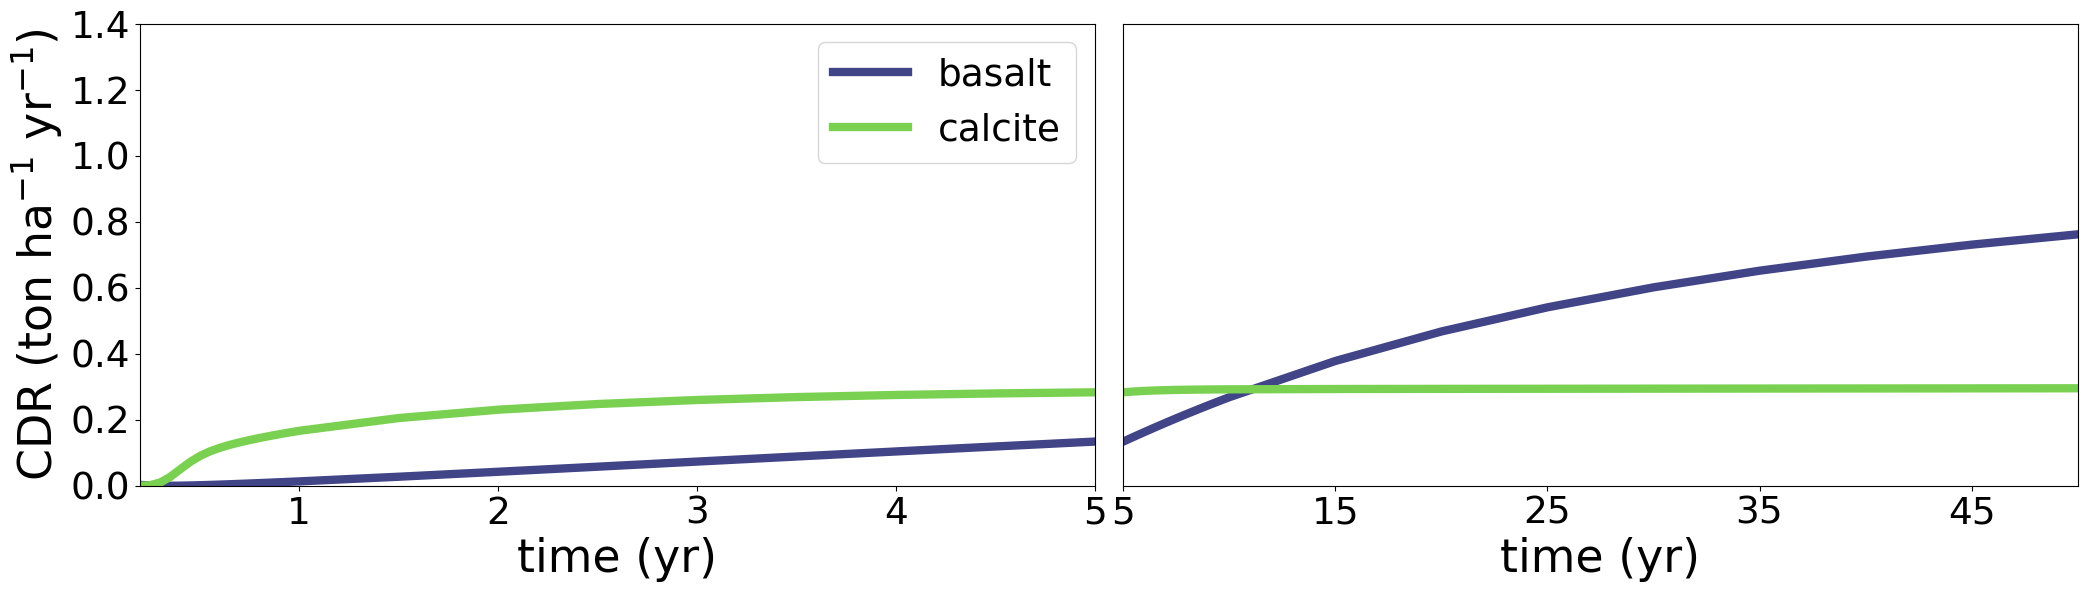

In [11]:
# --- plot removal, basalt vs calcite
# ----------------------------------------------------- #
saveFig = True
saveHere = "zz_figures/ex3_calcite-basalt"
saveName = "basalt_calciteCompare_2panels-1p5xRad-1p4Yax.png"
# ----------------------------------------------------- #

cdvarAdv = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"
removalType = "advective"  # advective or total

# aesthetics
logX = False
logY = False
mycmap = "viridis"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
dfcc_cont = outdf[(outdf["set"] == "flx_gas") & (outdf["run_id"] == "calcite")]
dfbas_cont = outdf[(outdf["set"] == "flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap

# axis labels and limits
xlab = "time (yr)"
ylab = r"CDR (ton ha$^{-1}$ yr$^{-1}$)"
ymin, ymax = 0, 1.4
xmin1, xmax1, xmin2, xmax2 = 0.2, 5, 5, 50
ticksize = 27
titlesize = 33
xtick2 = [5, 15, 25, 35, 45]
# line aes
lwd = 6
# legend
legsize = 27  # legend font size
second_legend = False

# --- PLOT
fig = plt.figure(figsize=(25, 6))  # Adjust figsize as needed
gs = GridSpec(1, 2, figure=fig, wspace=0.03)

# PANEL 1: years 0-5
ax = fig.add_subplot(gs[0])
if removalType == "advective":
    plt.plot(
        dfbas_cont["time"],
        dfbas_cont[cdvarAdv],
        color=cmap(0.8),
        label="basalt",
        linestyle="-",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_cont["time"],
        dfcc_cont[cdvarAdv],
        color=cmap(0.2),
        label="calcite",
        linestyle="-",
        linewidth=lwd,
    )
else:
    plt.plot(
        dfbas_cont["time"],
        dfbas_cont[cdvar],
        color=cmap(0.8),
        label="basalt",
        linestyle="--",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_cont["time"],
        dfcc_cont[cdvar],
        color=cmap(0.2),
        label="calcite",
        linestyle="--",
        linewidth=lwd,
    )
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(fontsize=ticksize)
plt.xlim([xmin1, xmax1])
plt.ylabel(ylab, fontsize=titlesize)
plt.yticks(fontsize=ticksize)
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
plt.legend(fontsize=legsize)

# PANEL 2: years 5-100
ax = fig.add_subplot(gs[1])
if removalType == "advective":
    plt.plot(
        dfbas_cont["time"],
        dfbas_cont[cdvarAdv],
        color=cmap(0.8),
        label="basalt",
        linestyle="-",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_cont["time"],
        dfcc_cont[cdvarAdv],
        color=cmap(0.2),
        label="calcite",
        linestyle="-",
        linewidth=lwd,
    )
else:
    plt.plot(
        dfbas_cont["time"],
        dfbas_cont[cdvar],
        color=cmap(0.8),
        label="basalt",
        linestyle="--",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_cont["time"],
        dfcc_cont[cdvar],
        color=cmap(0.2),
        label="calcite",
        linestyle="--",
        linewidth=lwd,
    )
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(xtick2, [int(val) for val in xtick2], fontsize=ticksize)
plt.xlim([xmin2, xmax2])
plt.yticks([])
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
if second_legend:
    plt.legend(fontsize=legsize)

# save if allowed
if saveFig:
    plt.savefig(os.path.join(saveHere, saveName), bbox_inches="tight")

plt.show();

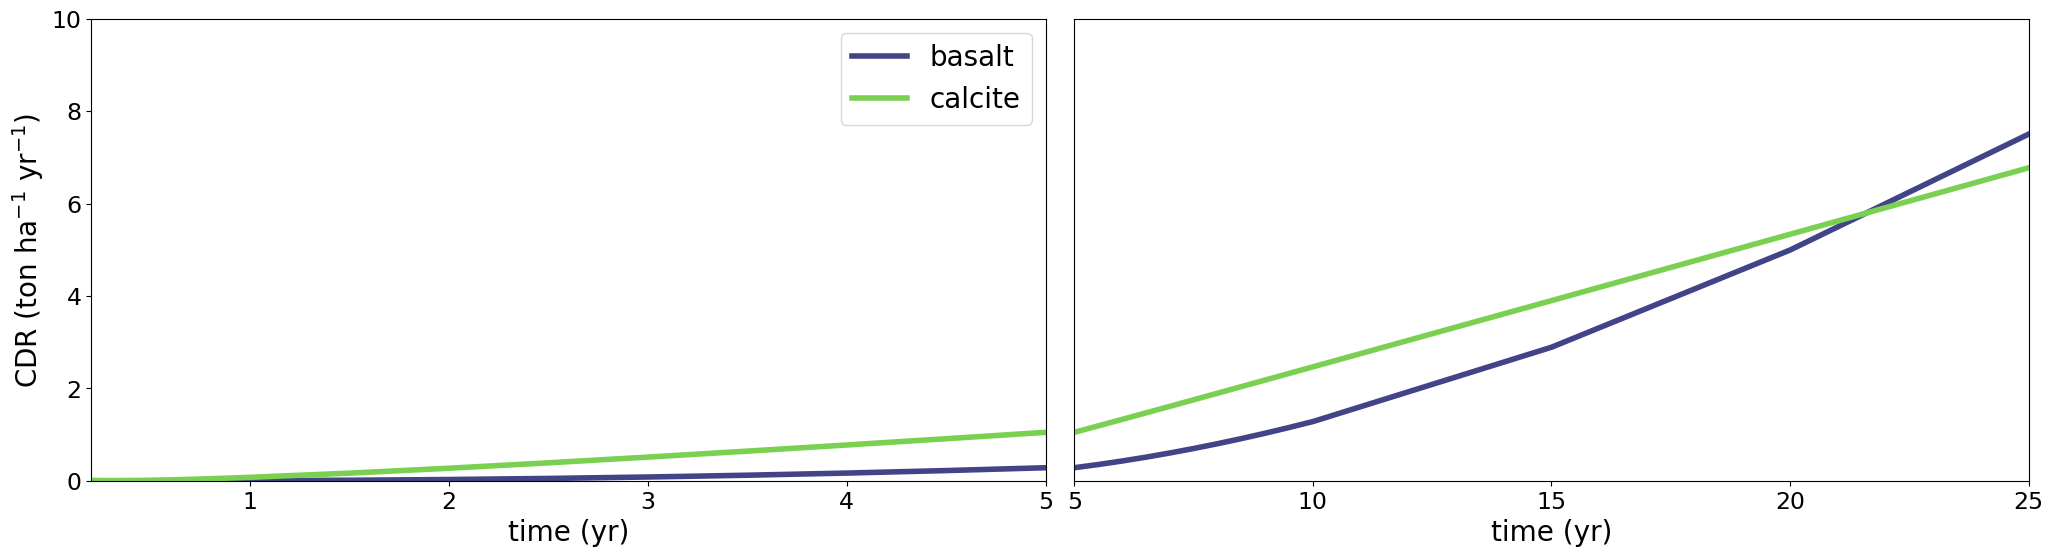

In [14]:
# --- plot integrated removal, basalt vs calcite
cdvarAdv = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"
removalType = "advective"  # advective or total

# aesthetics
logX = False
logY = False
mycmap = "viridis"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
dfcc_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "calcite")]
dfbas_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap

# axis labels and limits
xlab = "time (yr)"
ylab = r"CDR (ton ha$^{-1}$ yr$^{-1}$)"
ymin, ymax = 0, 10
ticksize = 17
titlesize = 20
xtick2 = [5, 10, 15, 20, 25]
# line aes
lwd = 4
# legend
legsize = 20  # legend font size
second_legend = False

# --- PLOT
fig = plt.figure(figsize=(25, 6))  # Adjust figsize as needed
gs = GridSpec(1, 2, figure=fig, wspace=0.03)

# PANEL 1: years 0-5
ax = fig.add_subplot(gs[0])
if removalType == "advective":
    plt.plot(
        dfbas_int["time"],
        dfbas_int[cdvarAdv] * dfbas_int["time"],
        color=cmap(0.8),
        label="basalt",
        linestyle="-",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_int["time"],
        dfcc_int[cdvarAdv] * dfcc_int["time"],
        color=cmap(0.2),
        label="calcite",
        linestyle="-",
        linewidth=lwd,
    )
else:
    plt.plot(
        dfbas_int["time"],
        dfbas_int[cdvar] * dfbas_int["time"],
        color=cmap(0.8),
        label="basalt",
        linestyle="--",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_int["time"],
        dfcc_int[cdvar] * dfcc_int["time"],
        color=cmap(0.2),
        label="calcite",
        linestyle="--",
        linewidth=lwd,
    )
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(fontsize=ticksize)
plt.xlim([0.2, 5])
plt.ylabel(ylab, fontsize=titlesize)
plt.yticks(fontsize=ticksize)
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
plt.legend(fontsize=legsize)

# PANEL 2: years 5-100
ax = fig.add_subplot(gs[1])
if removalType == "advective":
    plt.plot(
        dfbas_int["time"],
        dfbas_int[cdvarAdv] * dfbas_int["time"],
        color=cmap(0.8),
        label="basalt",
        linestyle="-",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_int["time"],
        dfcc_int[cdvarAdv] * dfcc_int["time"],
        color=cmap(0.2),
        label="calcite",
        linestyle="-",
        linewidth=lwd,
    )
else:
    plt.plot(
        dfbas_int["time"],
        dfbas_int[cdvar] * dfbas_int["time"],
        color=cmap(0.8),
        label="basalt",
        linestyle="--",
        linewidth=lwd,
    )
    plt.plot(
        dfcc_int["time"],
        dfcc_int[cdvar] * dfcc_int["time"],
        color=cmap(0.2),
        label="calcite",
        linestyle="--",
        linewidth=lwd,
    )
# Add labels and title
plt.xlabel(xlab, fontsize=titlesize)
plt.xticks(xtick2, [int(val) for val in xtick2], fontsize=ticksize)
plt.xlim([5, 25])
plt.yticks([])
if logY:
    plt.ylim([1e-4, ymax])
    plt.yscale("log")
else:
    plt.ylim([ymin, ymax])
# Add legend
if second_legend:
    plt.legend(fontsize=legsize)

plt.show();

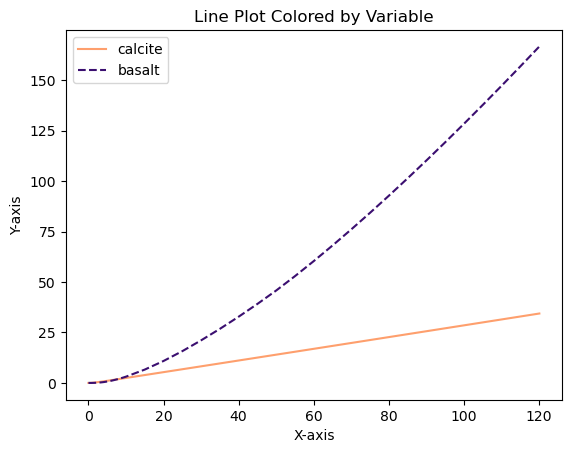

In [20]:
# --- plot CDR cumulative (lines colored by the set)
cdvar = "cdrAdv_ton_ha_yr"  # variable to plot

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite integrated fluxes
dfcc_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "calcite")]
dfbas_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
plt.plot(
    dfcc_int["time"],
    dfcc_int[cdvar] * dfcc_int["time"],
    color=cmap(0.2),
    label="calcite",
    linestyle="-",
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvar] * dfbas_int["time"],
    color=cmap(0.8),
    label="basalt",
    linestyle="--",
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.0001, 15])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

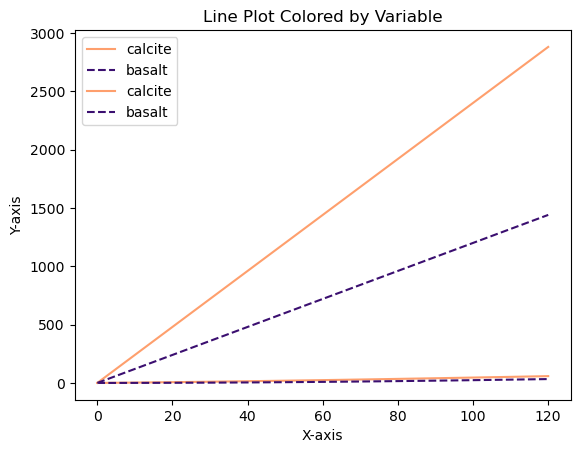

In [33]:
# --- plot CDR relative to potential
cdvar = "cdrAdv_ton_ha_yr"  # variable to plot
cdvarMax = "cdrMax_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite integrated fluxes
dfcc_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "calcite")]
dfbas_int = outdf[(outdf["set"] == "int_flx_gas") & (outdf["run_id"] == "basalt")]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
plt.plot(
    dfcc_int["time"],
    dfcc_int[cdvar] * dfcc_int["time"],
    color=cmap(0.2),
    label="calcite",
    linestyle="-",
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvar] * dfbas_int["time"],
    color=cmap(0.8),
    label="basalt",
    linestyle="--",
)
plt.plot(
    dfcc_int["time"],
    dfcc_int[cdvarMax] * dfcc_int["time"],
    color=cmap(0.2),
    label="calcite",
    linestyle="-",
)
plt.plot(
    dfbas_int["time"],
    dfbas_int[cdvarMax] * dfbas_int["time"],
    color=cmap(0.8),
    label="basalt",
    linestyle="--",
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.0001, 15])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

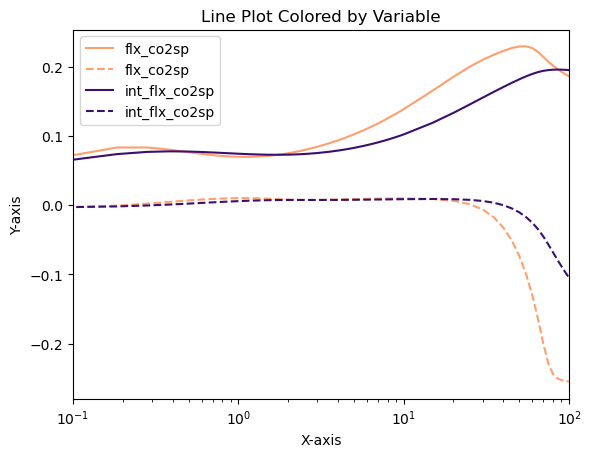

In [20]:
# --- plot individual contributions to CDR
difcol, advcol = "dif_co2g_change", "adv_DIC_change"  # variable to plot
cdvar = "cdr_ton_ha_yr"  # variable to plot

# aesthetics
logX = True
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# plot prep
grouped = outdf.groupby("set")
num_sets = len(grouped)
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
for i, (name, group) in enumerate(grouped):
    cmap_percentage = start_percentage + i * (end_percentage - start_percentage) / (
        num_sets - 1
    )
    color = cmap(cmap_percentage)
    plt.plot(group["time"], group[difcol] * -1, color=color, label=name, linestyle="-")
    plt.plot(
        group["time"],
        group[advcol] * (1 - adv_lossFactor),
        color=color,
        label=name,
        linestyle="--",
    )


# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.00001, 25])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

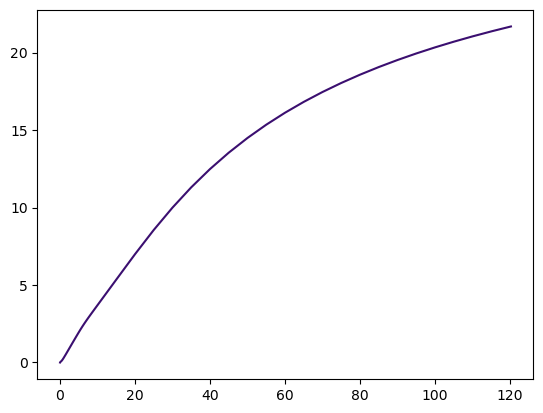

In [171]:
plt.plot(group["time"], group[cdvar], color=color, label=name)

In [170]:
group

,time,dif_co2g_change,adv_DIC_change,cdr_mol_m2_yr,set,cdr_ton_ha_yr
0,0.001111,0.000000,0.000000e+00,0.000000,int_flx_co2sp,0.000000
1,0.003026,-0.002024,9.777405e-07,0.002025,int_flx_co2sp,0.000891
2,0.010069,-0.005748,2.196623e-05,0.005770,int_flx_co2sp,0.002540
3,0.030576,-0.012755,1.611817e-04,0.012916,int_flx_co2sp,0.005684
4,0.050194,-0.017698,3.304539e-04,0.018028,int_flx_co2sp,0.007934
...,...,...,...,...,...,...
59,100.028801,-16.360641,3.978193e+00,20.338834,int_flx_co2sp,8.951121
60,105.019451,-16.667042,4.037652e+00,20.704693,int_flx_co2sp,9.112135
61,110.010101,-16.953145,4.094122e+00,21.047267,int_flx_co2sp,9.262902
62,115.271717,-17.235073,4.150706e+00,21.385780,int_flx_co2sp,9.411882


In [135]:
# subset data
pvar = "co2g"
colname = "dif_" + pvar + "_change"
df[colname] = 0.0

cond = (df["set"] == "int_flx_co2sp") & (df["var"] == "co2g")
dfx = df[cond]
# get initial flux
diff_init = dfx.loc[dfx["time"].idxmin(), "dif"]
# fill in new column
df.loc[cond, colname] = df.loc[cond, "dif"] - diff_init
df.loc[cond, colname]

0      0.000000
1     -0.002024
2     -0.005748
3     -0.012755
4     -0.017698
        ...    
59   -16.360641
60   -16.667042
61   -16.953145
62   -17.235073
63   -17.487820
Name: dif_co2g_change, Length: 64, dtype: float64